# PCA on Wine Dataset

## 1: Exploratory Data Analysis (EDA)

### 1.1 Load the Dataset and Perform Basic Data Exploration

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('wine.csv')

# Display the first few rows of the dataset
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 1.2 Examine the Distribution of Features

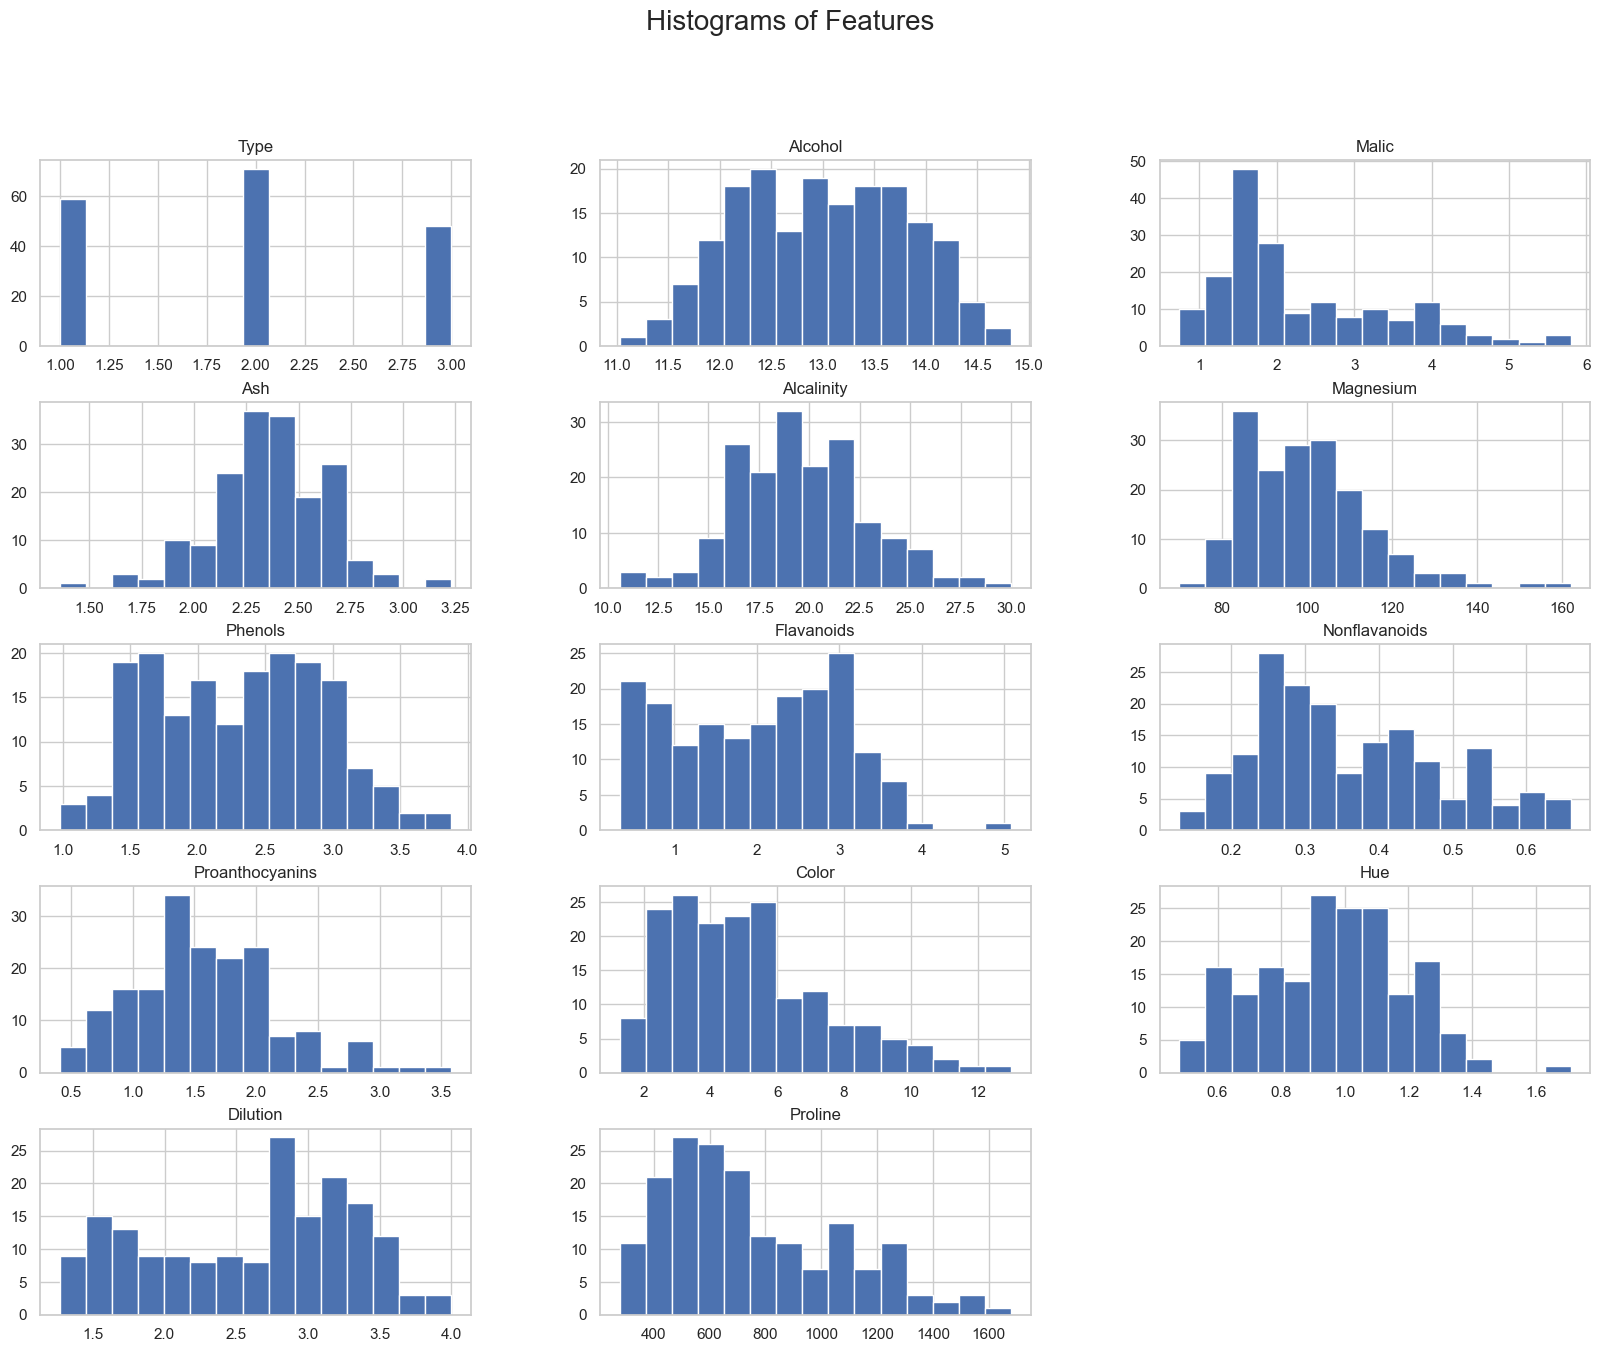

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot histograms for each feature
df.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histograms of Features', fontsize=20)
plt.show()

Here are some insights from the histograms:

1. **Type Distribution**: There are three types in the dataset. Type 1 has the highest frequency, followed by Type 2, and Type 3 has the lowest frequency.

2. **Alcohol**: The alcohol content is mostly concentrated between 12.5 and 14.0, with a peak around 13.0. This suggests a central tendency of alcohol content around 13%.

3. **Malic Acid**: The majority of the data points for malic acid are between 1 and 2, with a right-skewed distribution indicating fewer instances of higher malic acid levels.

4. **Ash**: The ash content appears to be normally distributed, centered around 2.3, with most values ranging between 2.0 and 2.5.

5. **Alcalinity of Ash**: This feature has a wide spread, with a peak around 20 and values ranging up to 30, indicating a relatively high variance in this feature.

6. **Magnesium**: The distribution is right-skewed, with most values between 80 and 120 and fewer instances as the values increase.

7. **Phenols**: The phenol content is fairly evenly distributed between 1.5 and 3.0, suggesting a balanced representation in this range.

8. **Flavanoids**: The distribution is left-skewed, with most values clustered between 1.0 and 3.0, indicating a higher frequency of lower flavanoid content.

9. **Nonflavanoid Phenols**: This feature is concentrated around 0.2 to 0.4, with a few values beyond 0.6.

10. **Proanthocyanins**: Most values are between 1.5 and 2.5, showing a somewhat symmetrical distribution around 2.0.

11. **Color Intensity**: The distribution shows that most values are between 2.0 and 6.0, with a few outliers going up to 12.0.

12. **Hue**: The hue is distributed mostly between 0.8 and 1.2, with a bell-shaped curve suggesting a normal distribution around 1.0.

13. **OD280/OD315 (Dilution)**: This feature has a peak around 3.0 and a few values lower than 1.5, showing a right-skewed distribution.

14. **Proline**: The proline content varies widely, with a right-skewed distribution and most values concentrated below 800.

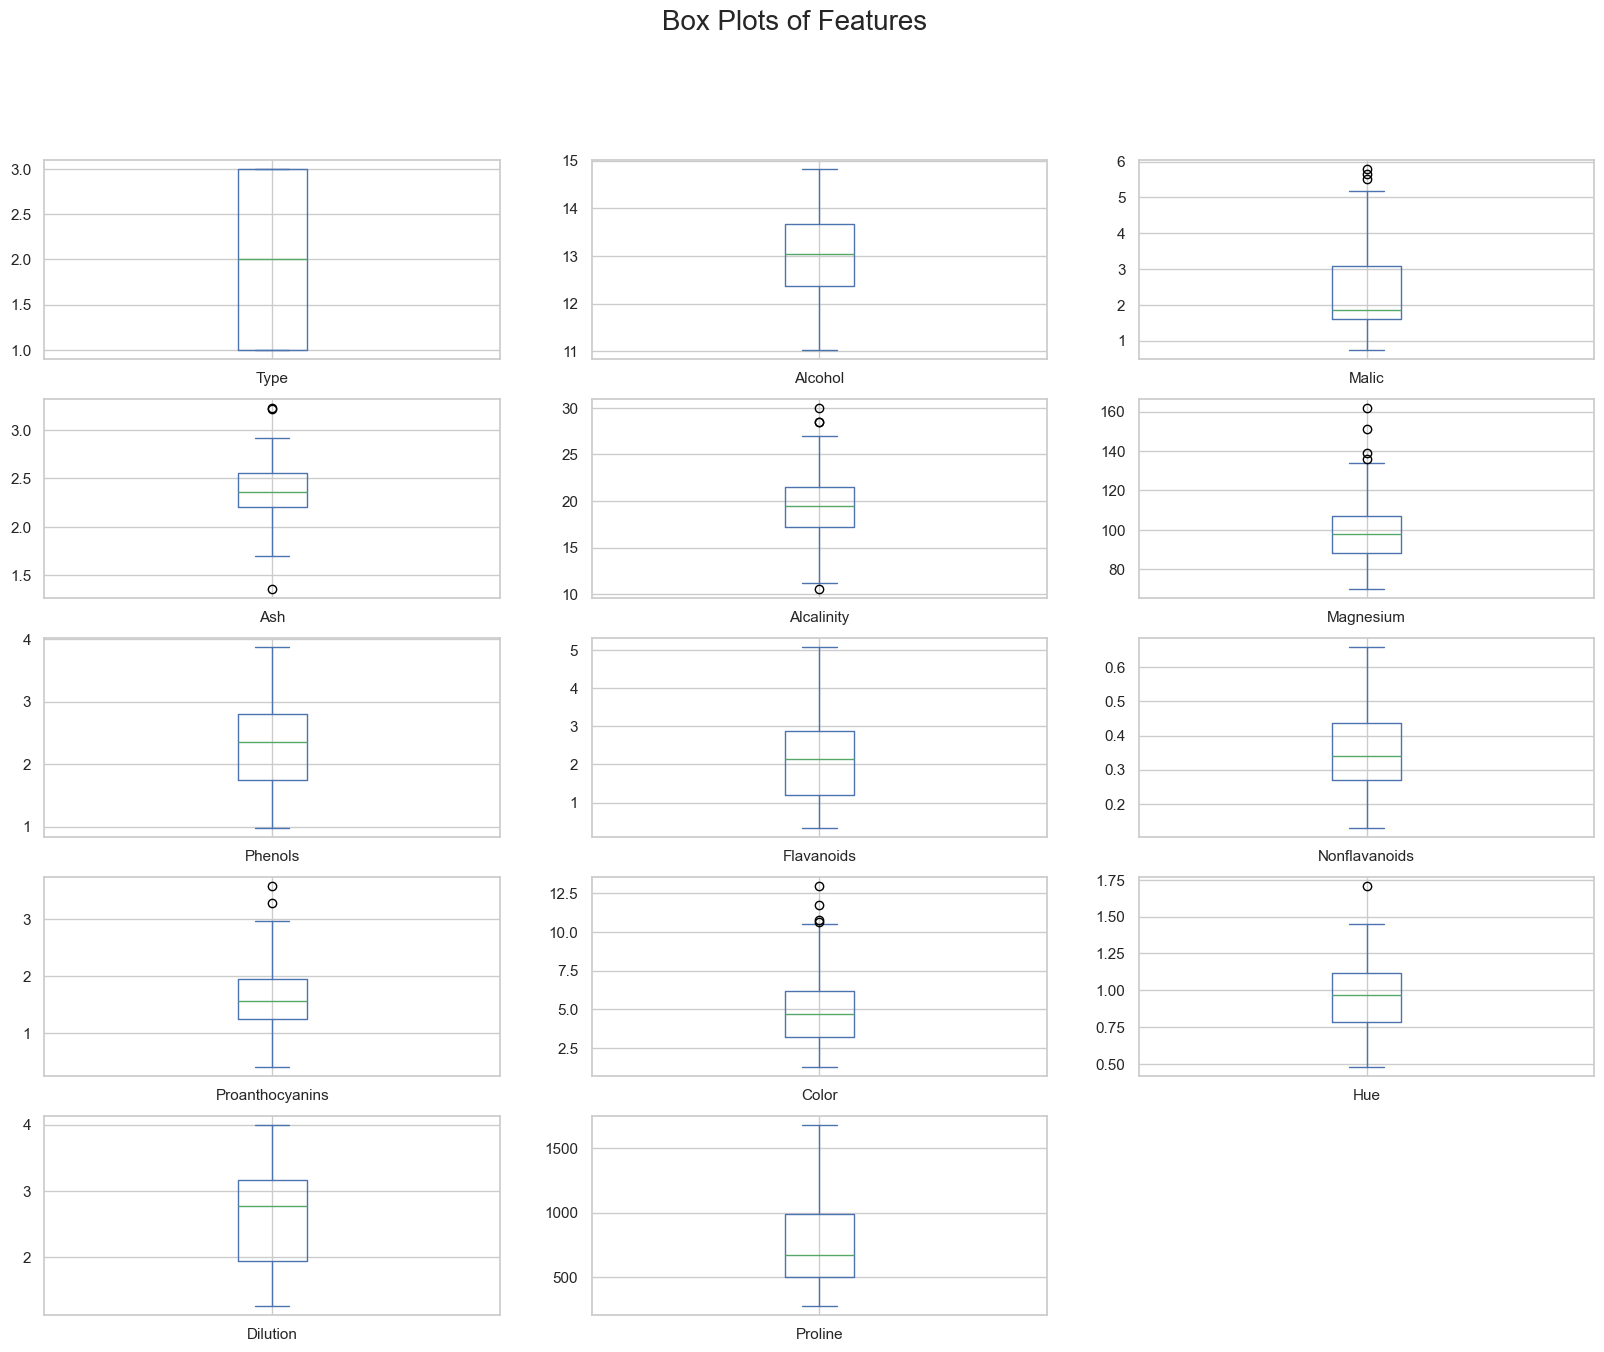

In [6]:
# Plot box plots for each feature
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(20, 15), title='Box Plots of Features')
plt.suptitle('Box Plots of Features', fontsize=20)
plt.show()

Insights from the box plots:

1. **Outliers**: Notable outliers are seen in features like `Malic Acid`, `Alcalinity`, `Magnesium`, `Flavanoids`, and `Color Intensity`, suggesting unusual values that may need further investigation.
2. **Symmetric Distributions**: `Alcohol`, `Phenols`, `Nonflavanoid Phenols`, and `Dilution` have symmetric distributions with no significant outliers.
3. **Wide Range**: `Proline` and `Alcalinity` show a wide range, indicating high variability.
4. **Central Tendency**: Most features are centered around their median values, with relatively narrow interquartile ranges (IQR), indicating data clustering around the median.

### 1.3 Investigate Correlations Between Features

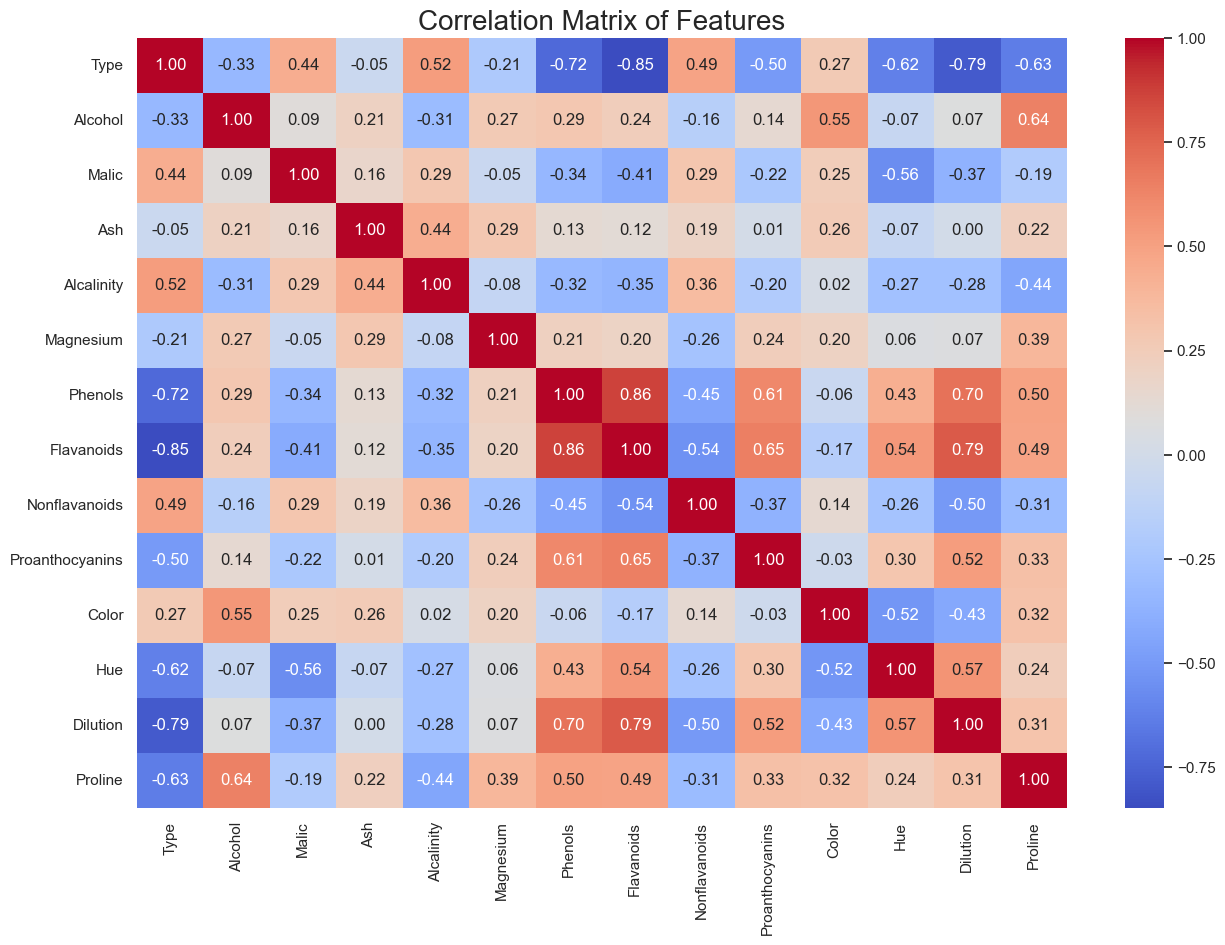

In [7]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()

Insights from the correlation matrix:

1. **Strong Positive Correlations**:
   - `Flavanoids` and `Phenols` (0.86)
   - `Phenols` and `Dilution` (0.70)
   - `Proanthocyanins` and `Phenols` (0.61)

2. **Strong Negative Correlations**:
   - `Type` and `Flavanoids` (-0.85)
   - `Type` and `Dilution` (-0.79)
   - `Type` and `Phenols` (-0.72)

3. **Alcohol & Proline**: Moderate positive correlation (0.64), indicating that as alcohol content increases, proline levels tend to increase as well.

4. **Type**: Shows significant correlations with many features, such as `Phenols`, `Flavanoids`, and `Dilution`, which suggests that these features may be good predictors for wine type classification.

## 2: Dimensionality Reduction with PCA

### 2.1 Standardize the Features

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Type', axis=1))

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[1:])
scaled_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### 2.2 Implement PCA

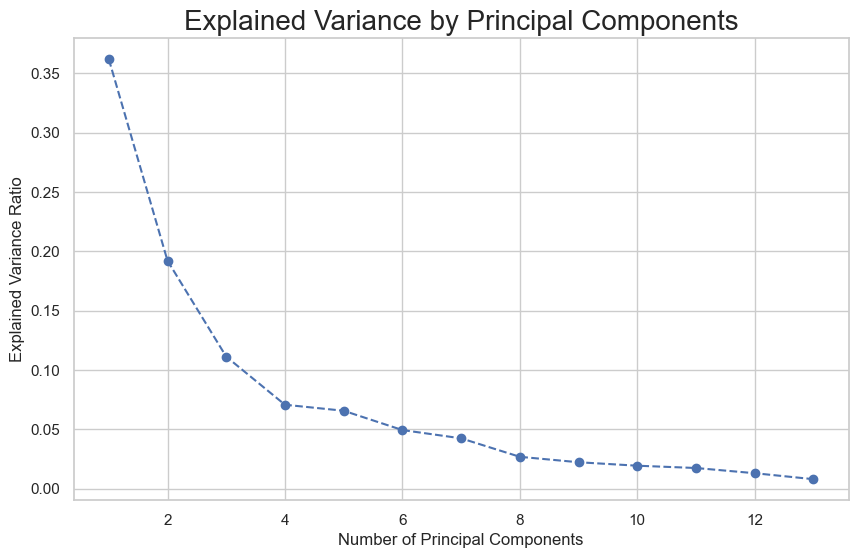

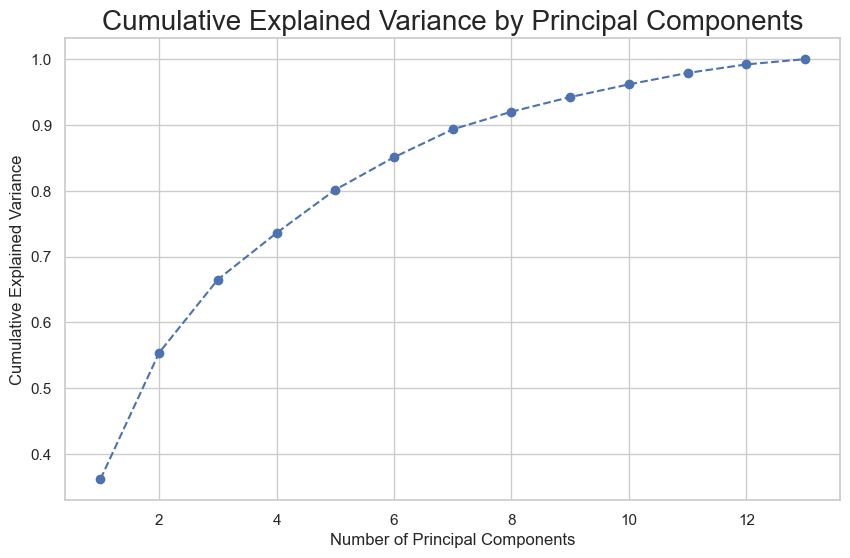

In [9]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(scaled_df)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components', fontsize=20)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=20)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Insights:**

1. **Explained Variance by Principal Components**:
   - The first plot shows that the first few principal components capture a significant amount of variance, with the explained variance ratio decreasing sharply as the number of components increases.
   - The first 3 to 4 components capture the majority of the variance, while additional components explain less variance incrementally. This pattern suggests diminishing returns in terms of variance explained as more components are added.

2. **Cumulative Explained Variance**:
   - The second plot shows the cumulative explained variance. The first five to six components capture over 80% of the total variance, with the curve flattening as more components are added. This suggests that selecting a smaller number of components (around five or six) would retain most of the dataset's information while reducing dimensionality.

### 2.3 Transform the Original Dataset into Principal Components

In [32]:
# Determine the optimal number of principal components
optimal_components = 4  # This is based on the explained variance plot

# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
pca_df = pca.fit_transform(scaled_df)

# Convert the PCA data back to a DataFrame
pca_df = pd.DataFrame(pca_df, columns=[f'PC{i+1}' for i in range(optimal_components)])
pca_df.head()

,PC1,PC2,PC3,PC4
0,3.316751,1.443463,-0.165739,-0.215631
1,2.209465,-0.333393,-2.026457,-0.291358
2,2.516740,1.031151,0.982819,0.724902
3,3.757066,2.756372,-0.176192,0.567983
4,1.008908,0.869831,2.026688,-0.409766


## 3: Clustering with Original Data

### 3.1 Apply K-means Clustering to the Original Dataset

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans_labels

# Evaluate the clustering performance
silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
davies_bouldin_avg = davies_bouldin_score(scaled_df, kmeans_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648


### 3.2 Visualize the Clustering Results

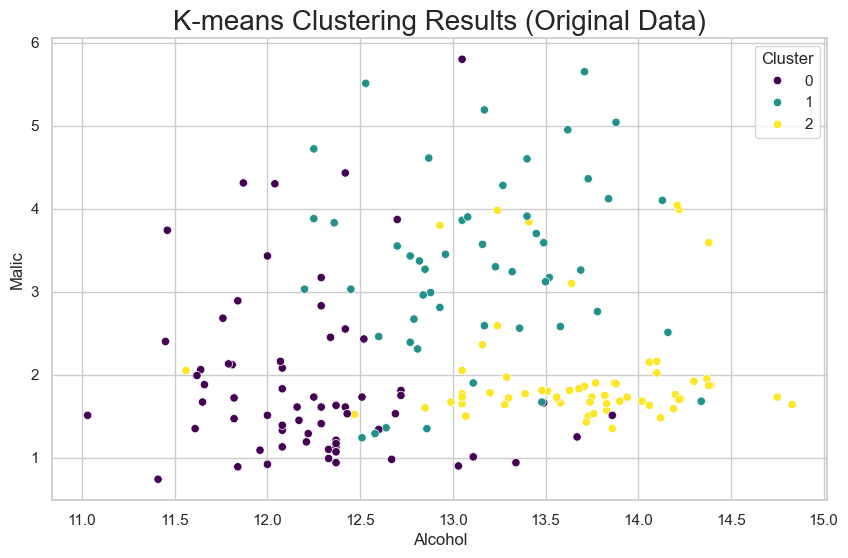

In [34]:
# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Alcohol', y='Malic', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering Results (Original Data)', fontsize=20)
plt.show()

## 4: Clustering with PCA Data

### 4.1 Apply K-means Clustering to the PCA-transformed Dataset

In [35]:
# Apply K-means clustering to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_pca_labels

# Evaluate the clustering performance
silhouette_pca_avg = silhouette_score(pca_df, kmeans_pca_labels)
davies_bouldin_pca_avg = davies_bouldin_score(pca_df, kmeans_pca_labels)

print(f'Silhouette Score (PCA): {silhouette_pca_avg}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca_avg}')

Silhouette Score (PCA): 0.4485186619585601
Davies-Bouldin Index (PCA): 0.8917386632653242


### 4.2 Visualize the Clustering Results

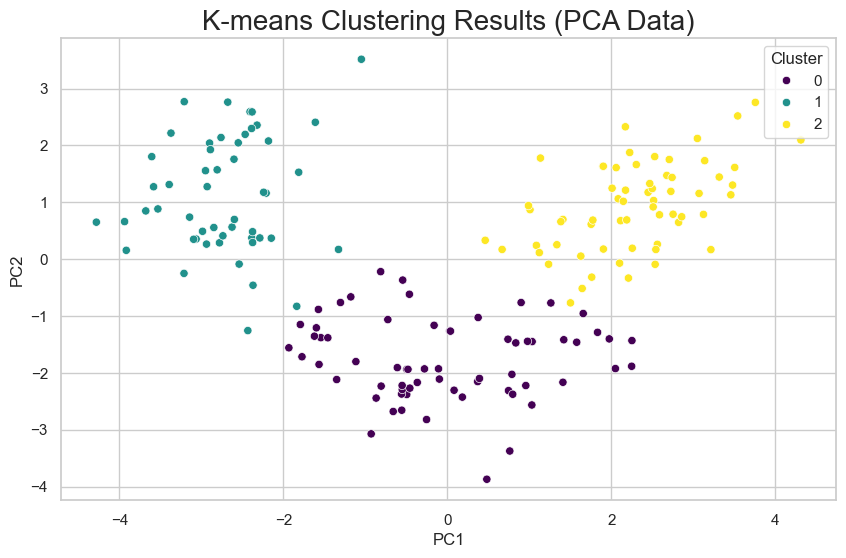

In [36]:
# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering Results (PCA Data)', fontsize=20)
plt.show()

## 5: Comparison and Analysis

### 5.1 Compare the Clustering Results

In [37]:
# Compare the silhouette scores and Davies-Bouldin indices
print(f'Silhouette Score (Original Data): {silhouette_avg}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_avg}')
print(f'Silhouette Score (PCA Data): {silhouette_pca_avg}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca_avg}')

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.3891879777181648
Silhouette Score (PCA Data): 0.4485186619585601
Davies-Bouldin Index (PCA Data): 0.8917386632653242


### 5.2 Discuss the Impact of Dimensionality Reduction

#### 1. **Silhouette Score**:
   - Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
   - Ranges from **-1** to **1**: higher values indicate better-defined clusters.

   - **Original Data**: Silhouette Score = **0.2849**
     - This score suggests that the clustering isn't very well-defined in the original data. It's relatively low, indicating that clusters are not clearly separated.
   
   - **PCA Data**: Silhouette Score = **0.4485**
     - After PCA, the Silhouette Score has **improved significantly**. A score of around **0.45** indicates that clusters are better defined with less overlap between clusters. PCA seems to have reduced noise or redundant features, leading to better clustering performance.

#### 2. **Davies-Bouldin Index**:
   - Measures the ratio of intra-cluster distance to inter-cluster distance.
   - Lower values indicate **better clustering** (since you want small intra-cluster distances and large inter-cluster distances).

   - **Original Data**: Davies-Bouldin Index = **1.389**
     - This indicates that clusters are somewhat overlapping or not well-separated in the original dataset.

   - **PCA Data**: Davies-Bouldin Index = **0.892**
     - After applying PCA, the Davies-Bouldin Index has **decreased**, showing an improvement in cluster separation and tighter cohesion within clusters.

#### **Overall Insights**:
- **PCA has improved the clustering quality** significantly, as seen by both an increase in the Silhouette Score (indicating better-defined clusters) and a decrease in the Davies-Bouldin Index (indicating more compact and well-separated clusters).
- This suggests that applying PCA has helped remove irrelevant features, reduce noise, and capture the most important variance in the data, leading to better cluster formation.

Based on these metrics, the **PCA-transformed data provides better clustering results** compared to the original dataset.

## 6: Conclusion and Insights

### 6.1 Summary of Key Findings and Insights
In this assignment, we performed Principal Component Analysis (PCA) and clustering on the Wine dataset. The key findings and insights are as follows:
- PCA helped in reducing the dimensionality of the dataset while retaining most of the variance.
- The first few principal components captured a significant amount of the variance in the data.
- Clustering techniques such as K-means and hierarchical clustering were used to group similar wines based on their features.
- The clusters formed were analyzed to understand the characteristics of different groups of wines.

### 6.2 Practical Implications of Using PCA and Clustering in Data Analysis
PCA and clustering are powerful techniques in data analysis with several practical implications:
- **PCA**: PCA is useful for reducing the dimensionality of large datasets, making it easier to visualize and analyze the data. It helps in identifying the most important features and removing noise from the data.
- **Clustering**: Clustering helps in grouping similar data points together, which can be useful in various applications such as customer segmentation, anomaly detection, and image segmentation.

### 6.3 Recommendations for When to Use Each Technique
Based on the analysis conducted, the following recommendations can be made:
- **Use PCA** when you have a high-dimensional dataset and want to reduce the number of features while retaining most of the variance. PCA is also useful for visualizing the data in lower dimensions.
- **Use Clustering** when you want to group similar data points together and identify patterns or segments in the data. Clustering is useful for exploratory data analysis and can provide insights into the structure of the data.


####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.